# Ejercicio: Mapa de imágenes usando técnicas no lineales

Data mining: Dimensionality reduction  
Author: Steven Van Vaerenbergh  
Universidad de Cantabria  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

from mpl_toolkits.mplot3d import Axes3D

# Módulo para medir el tiempo de ejecución
from time import time

%matplotlib inline

# Datos

In [2]:
# Cargamos los datos
from sklearn.datasets import load_digits

digits = load_digits()

# Contenidos del diccionario "digits"
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# Tamaño del dataset
X = digits.data
X.shape

(1797, 64)

# a) Calcula un mapa de dígitos usando Isomap

In [4]:
# Parámetros de Isomap

n_neighbors = 10
n_components = 2

In [5]:
# Training de Isomap

t0 = time()

isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
Y_isomap = isomap.fit_transform(X)

t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))

Isomap: 0.75 sec


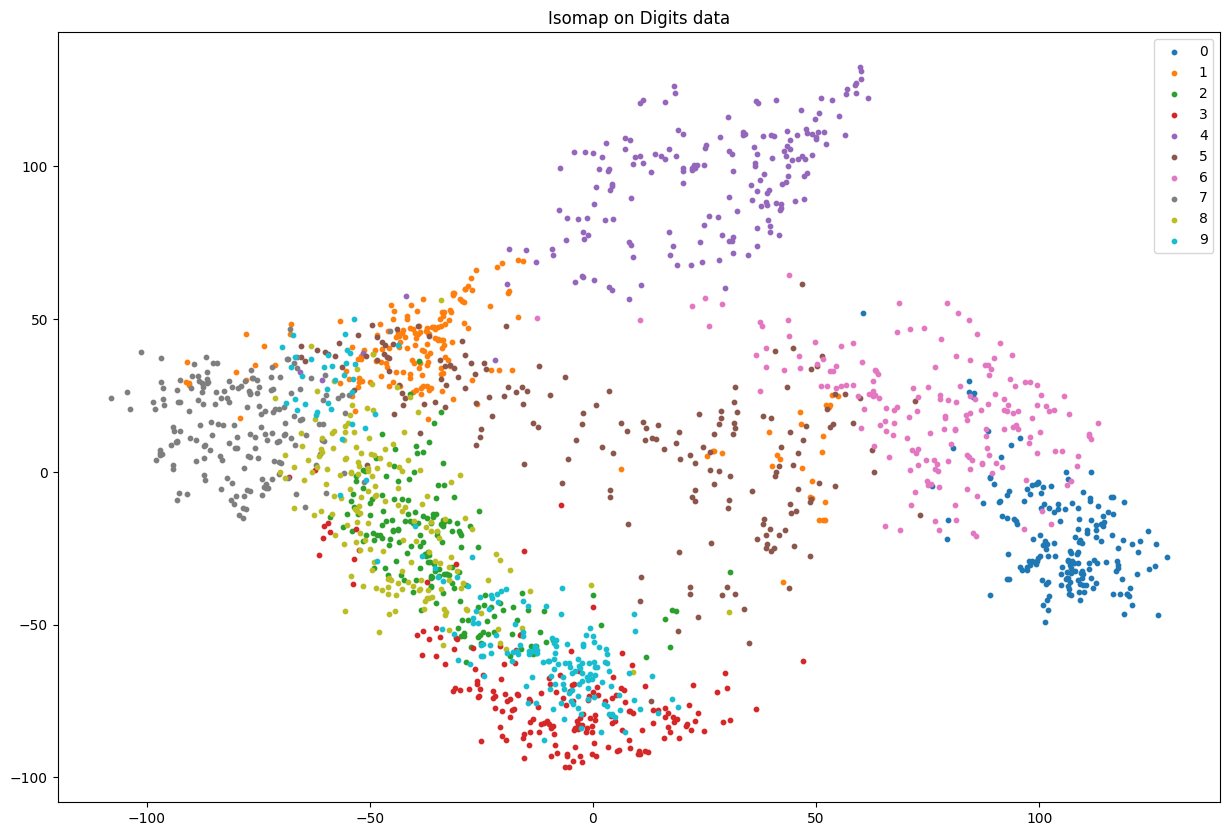

In [6]:
# Dibuja el mapa calculado

fig, ax = plt.subplots(figsize=[15,10])

for c in np.unique(digits.target):
    i = np.where(digits.target == c)
    
    # Dibuja todos los puntos de la clase i
    ax.scatter(Y_isomap[i,0], Y_isomap[i,1], label = c, s = 10)
    
ax.legend(loc='upper right')
plt.title("Isomap on Digits data")
plt.show()

# b) Calcula un mapa de dígitos usando LLE

In [7]:
# Parámetros de LLE

n_neighbors = 10
n_components = 2

In [13]:
# Training de LLE

t0 = time()

lle = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components,
                                      eigen_solver='auto',method='modified',
                                      random_state=1)
Y_lle = lle.fit_transform(X)

t1 = time()
print("LLE: %.2g seg" % (t1 - t0))

LLE: 0.89 seg


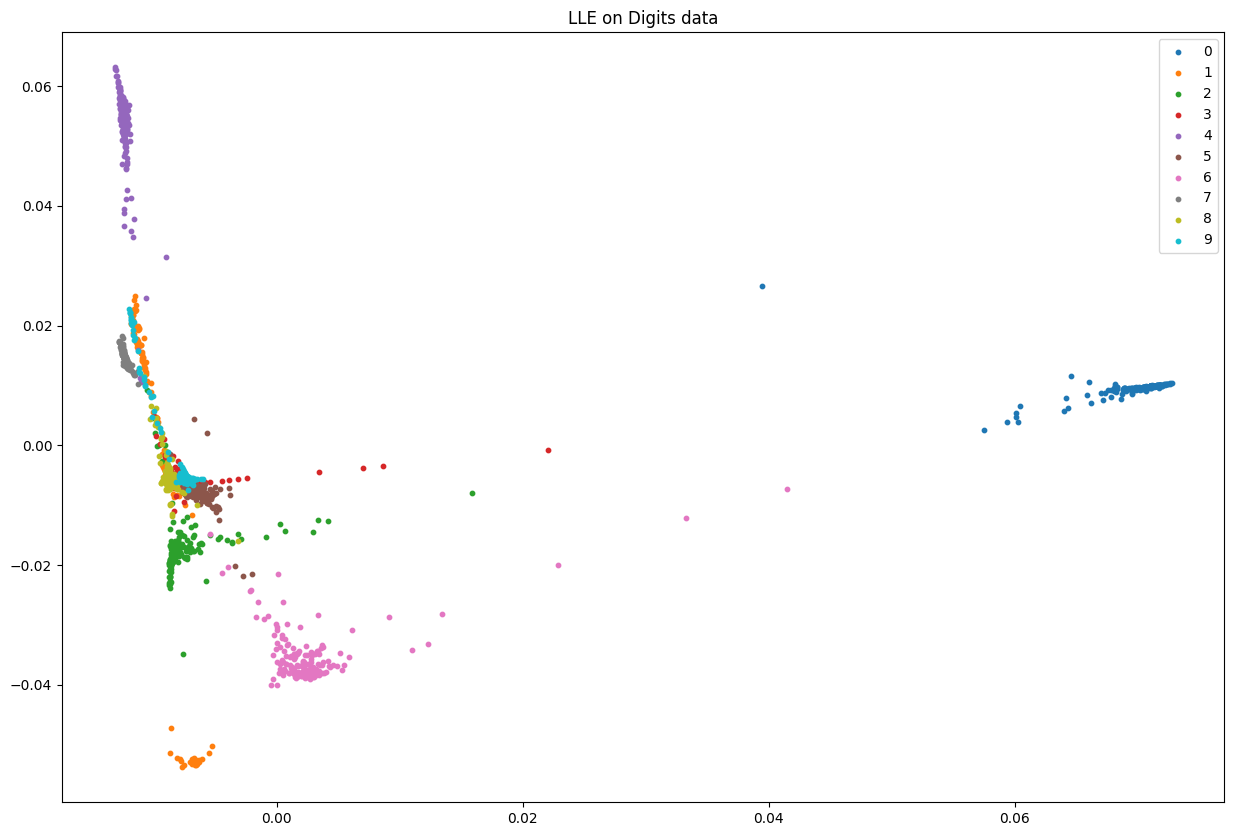

In [14]:
# Dibuja el mapa calculado

fig, ax = plt.subplots(figsize=[15,10])

for c in np.unique(digits.target):
    i = np.where(digits.target == c)
    
    # Dibuja todos los puntos de la clase i
    ax.scatter(Y_lle[i,0], Y_lle[i,1], label = c, s = 10)
    
ax.legend(loc='upper right')
plt.title("LLE on Digits data")
plt.show()

# c) Calcula un mapa de dígitos usando t-SNE

In [15]:
# Parámetros de t-SNE

n_neighbors = 10
n_components = 2

In [16]:
# Training de t-SNE

t0 = time()

tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y_tsne = tsne.fit_transform(X)

t1 = time()
print("t-SNE: %.2g seg" % (t1 - t0))

t-SNE: 2.7 seg


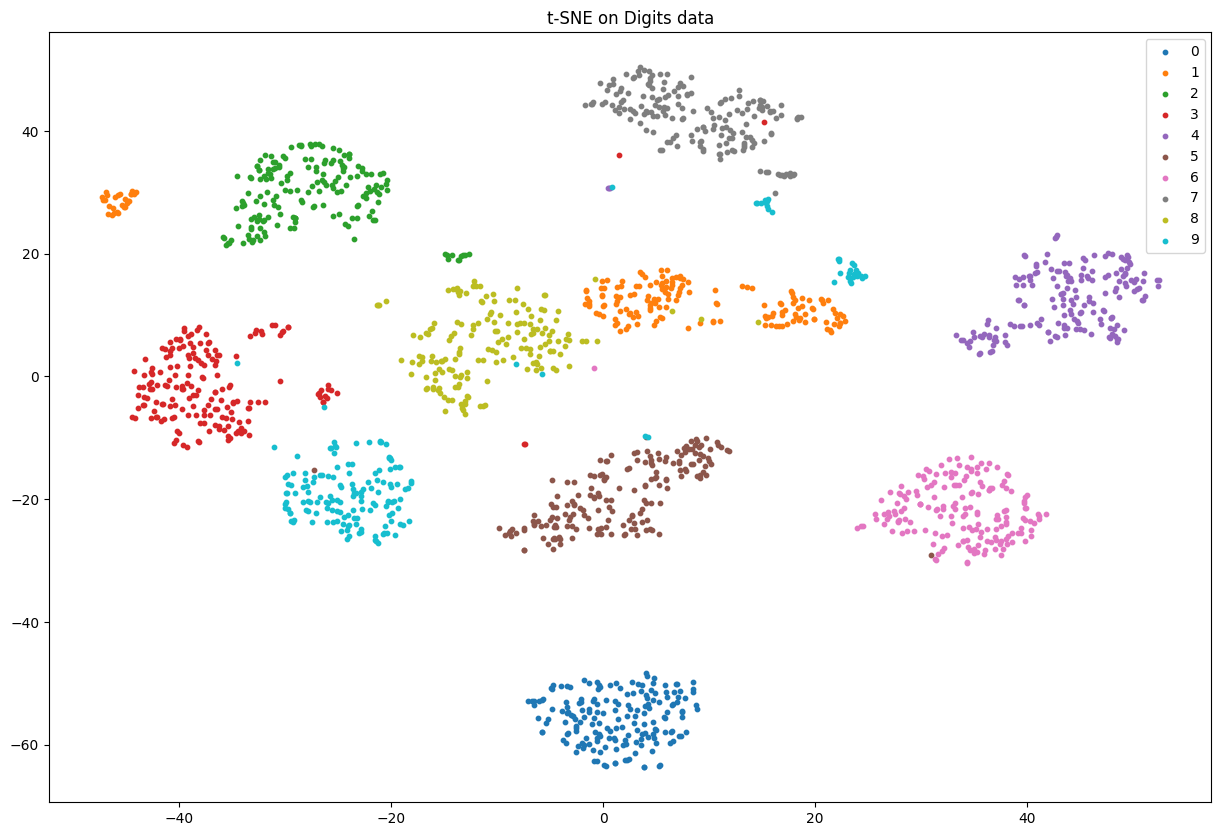

In [17]:
# Dibuja el mapa calculado

fig, ax = plt.subplots(figsize=[15,10])

for c in np.unique(digits.target):    
    i = np.where(digits.target == c)
    
    # Dibuja todos los puntos de la clase i
    ax.scatter(Y_tsne[i,0], Y_tsne[i,1], label = c, s = 10)
    
ax.legend(loc='upper right')
plt.title("t-SNE on Digits data")
plt.show()